<a href="https://colab.research.google.com/github/carolvieirav/Estatistica_Python/blob/main/Teste%20de%20Hip%C3%B3teses/teste_de_hipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste de Hipótese

In [1]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import scale


from scipy import stats

https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset

In [3]:
bike_sharing_data = pd.read_csv('/content/day.csv')

bike_sharing_data.shape

(731, 16)

In [4]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bike_sharing_data = bike_sharing_data[['season', 
                                       'mnth', 
                                       'holiday', 
                                       'workingday', 
                                       'weathersit', 
                                       'temp',
                                       'cnt']]

In [8]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [9]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4])

In [10]:
bike_sharing_data['workingday'].unique()

array([0, 1])

In [11]:
bike_sharing_data['holiday'].unique()

array([0, 1])

In [12]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3])

In [13]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [14]:
bike_sharing_data['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

In [15]:
bike_sharing_data.shape

(731, 7)

In [16]:
# medir impacto das variáveis

In [17]:
bike_sharing_data.groupby("workingday")['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


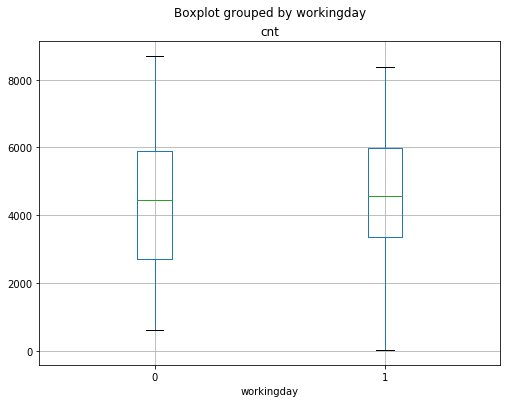

In [ ]:
bike_sharing_data.boxplot(column=['cnt'], by='workingday', figsize=(8, 6))

In [ ]:
sample_01 = bike_sharing_data.query('workingday == 1').reset_index(drop=True)

sample_02 = bike_sharing_data.query('workingday == 0').reset_index(drop=True)

In [ ]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

In [ ]:
# pegue uma amostra do menor tamanho para comparar.

sample_01 = sample_01.sample(231).reset_index(drop=True)
sample_01.shape, sample_02.shape

((231, 7), (231, 7))

## Hipótese sendo testada

<b>Hipótese Nula (H0):</b> u1 = u2, que representa que a mádia de `sample_01` é igual a média de `sample 02`

<b>Hipótese Alternativa (H1):</b> u1 ? u2, a média de`sample01` não é igual à média de `sample 02`

## T- teste

In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=1.4853223662851482, pvalue=0.13814341647248232)

Como pvalue > 0.05, eu não posso rejeitar a hipótese de que as médias de `sample_01` e `sample_02` sejam iguais (hipótese nula) com uma confiança maior que 0.95 (95%).

## Teoria

### Homogeneidade de variância 

T-teste e ANOVA (análise de variâncias) assumem que as amostras a serem comparadas têm a mesma variância (ou seja, elas têm homogeneidade de variância).

- O teste de Levene é um teste muito utilizado para comparar a variância de duas ou mais amostras. Ou seja, este teste verifica o conceito de homogeneidade de variâncias.

Isso quer dizer que se acharmos o p-valor menor que .05, indica que podemos rejeitar a hipótese de que a variância é igual nas amostras.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

In [ ]:
# queremos verificar se a variável `cnt` em nosso dataframe tem a mesma variação entre as amostras:


# hipotese nula do teste de levene é 
# H0: as variâncias entre as amostras são iguais
# H1: as variâncias entre as amostras são diferentes

stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=1.2832579370121646, pvalue=0.2578842560105756)

Como pvalue > 0.05, novamente, não posso rejeitar a hipótese de que as variâncias são iguais.

### Resíduos da distribuição normal

Outra suposição importante desses testes que estamos realizando é: os resíduos entre os grupos precisam ter distribuição normal - ou seja, se subtrairmos os valores amostrais, precisamos obter uma distribuição gaussiana.


In [ ]:
from sklearn.preprocessing import scale

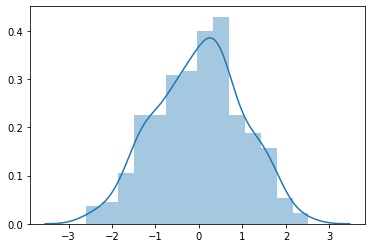

In [ ]:
diff = scale(sample_01['cnt'] - sample_02['cnt'])

sns.distplot(diff);

#### Verificando a normalidade pelo gráfico de plotagem Q-Q

https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

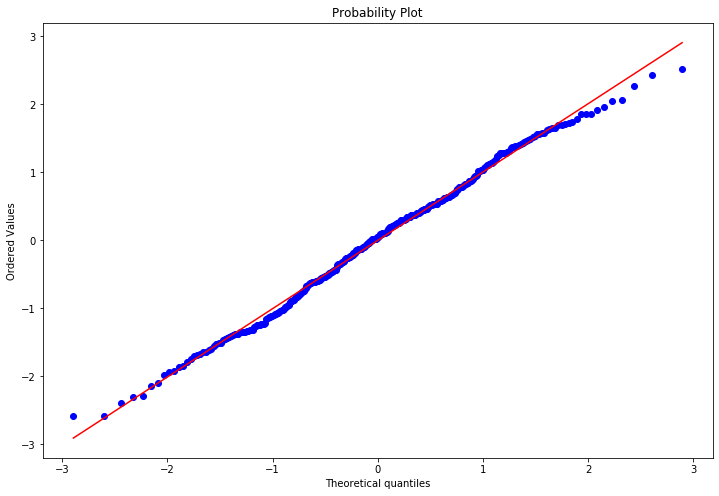

In [ ]:
plt.figure(figsize=(12, 8))

stats.probplot(diff, plot=plt, dist='norm')

plt.show()

#### Verificando a distribuição normal pelo `método shapiro`

O teste `shapiro-wilk` é um teste estatístico que acessa numericamente se uma distribuição de uma amostra vem de uma população que tinha uma distribuição gaussiana.

A hipótese nula do teste `shapiro-wilk` é, portanto, que sua amostra vem de uma distribuição normal.

Se o valor de p for maior que 0,05, significa que você não pode rejeitar a hipótese de que a amostra vem de uma população que tem distribuição normal.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test

In [ ]:
stats.shapiro(diff)

(0.9943222403526306, 0.1953406035900116)

O primeiro item na tupla é chamado de "estatística de teste W" e o segundo valor é o valor-p. Como a estatística de teste não produz um valor p significativo, os dados são indicados como distribuídos normalmente

Os dados atenderam a todas as suposições para o teste t, o que indica que os resultados podem ser confiáveis ​​e o teste t é um teste apropriado a ser usado.

### t-test usando `scipy.stats`

In [ ]:
sample_01.cnt.mean()

4607.225108225109

In [ ]:
sample_02.cnt.mean()

4330.168831168831

In [ ]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

# H0: media de cnt em working_day = 1 era igual a media de cnt em working_day = 0
# Como pvalue > 0.05, não consegui rejeitar a hipótese nula. Portanto, posso continuar trabalhando com H0

Ttest_indResult(statistic=1.4853223662851482, pvalue=0.13814341647248232)

## Welch's t-test.

Um teste mais robusto que não exige que as variâncias sejam iguais.

In [ ]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'], equal_var=False)

Ttest_indResult(statistic=18.91432062847575, pvalue=5.585347274547989e-65)

Como pvalue << 0.05, eu posso rejeitar a hipótese nula (a hipótese de que as médias são iguais)